# Principal Component Analysis

## import library

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [48]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

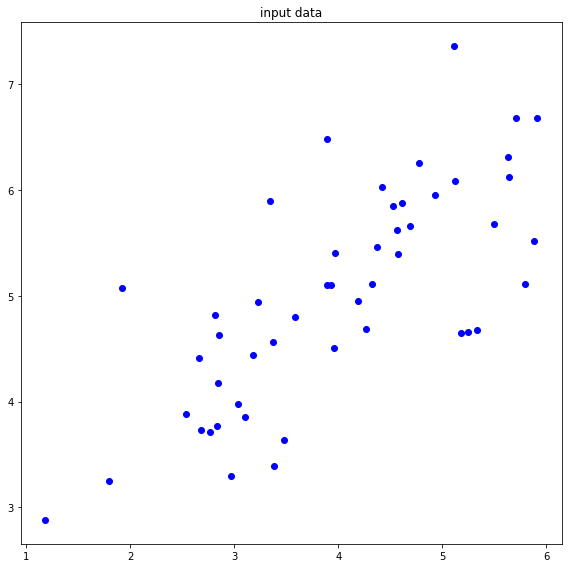

In [49]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y, 'o', color = 'blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

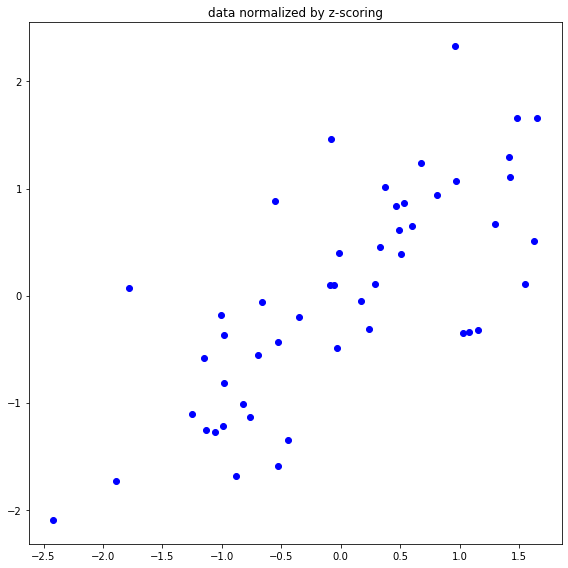

In [87]:
normal_z = (feature - np.mean(feature, axis = 0)) / np.std(feature, axis = 0)
normal_x = normal_z[:, 0]
normal_y = normal_z[:, 1]

# ====================================
# for plotting here


# plt.figure(figsize=(8,8))
# plt.title('data normalized by z-scoring')

# plt.plot(normal_x, normal_y, 'o', color = 'blue')

# plt.tight_layout()
# plt.show()


# ====================================

def plot_normalize_data(normal_x, normal_y):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')

    plt.plot(normal_x, normal_y, 'o', color = 'blue')

    plt.tight_layout()
    plt.show()

## compute covariance matrix

In [88]:
def compute_covariance(feature):
    feature_T = np.transpose(feature)
    
    Sigma = np.cov(feature_T)
    
    return Sigma

## compute principal directions

In [89]:
def compute_eigen(X):
    eigenValue, eigenVector = np.linalg.eig(X)
    
    S = eigenValue
    U = eigenVector    
    return S, U

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


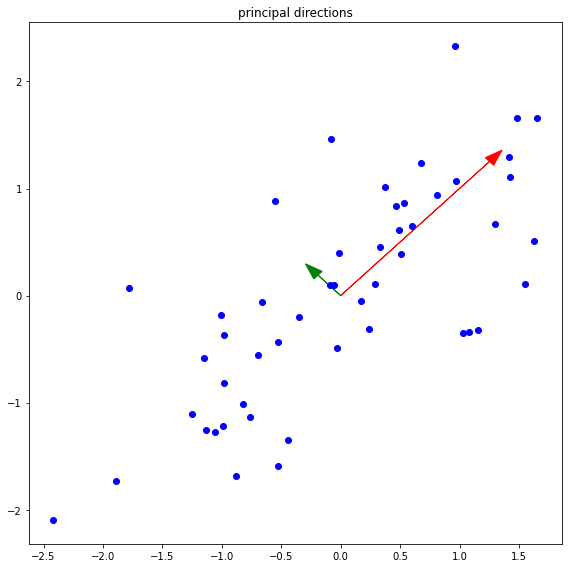

In [90]:
origin = [0, 0]

sigma = compute_covariance(normal_z)
e_Value, e_Vector = compute_eigen(sigma)

# =====================================
# for plotting here


# first_eigenValue = e_Value[0]
# first_eigenVector = e_Vector[:, 0]

# second_eigenValue = e_Value[1]
# second_eigenVector = e_Vector[:, 1]

# plt.figure(figsize=(8,8))
# plt.title('principal directions')

# plt.plot(normal_x, normal_y, 'o', color = 'blue')

# plt.arrow(0, 0, first_eigenVector[0] * first_eigenValue, first_eigenVector[1] * first_eigenValue, head_width = 0.1, color = 'red')
# plt.arrow(0, 0, second_eigenVector[0] * second_eigenValue, second_eigenVector[1] * second_eigenValue, head_width = 0.1, color = 'green')

# plt.tight_layout()
# plt.show()


# =====================================

def plot_principal_directions(normal_x, normal_y, origin, e_Value, e_Vector):
    first_eigenValue = e_Value[0]
    first_eigenVector = e_Vector[:, 0]

    second_eigenValue = e_Value[1]
    second_eigenVector = e_Vector[:, 1]
    
    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    plt.plot(normal_x, normal_y, 'o', color = 'blue')

    plt.quiver(*origin, *first_eigenVector_fin, color = 'red')
    plt.quiver(*origin, *second_eigenVector, color = 'green')

    plt.tight_layout()
    plt.show()

## first principal axis

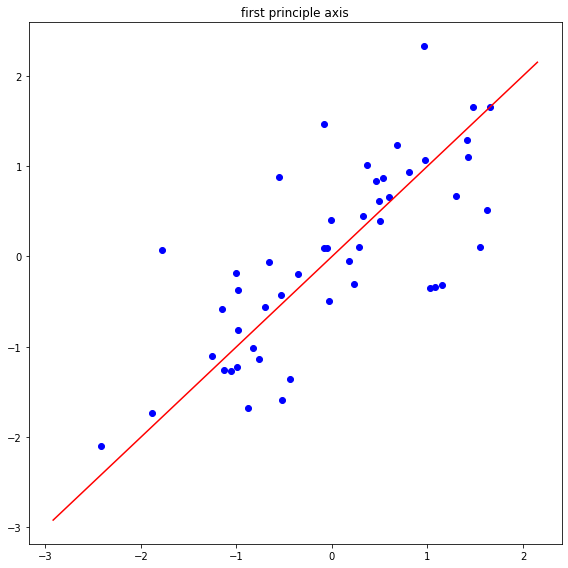

In [94]:
# ===================================
# for plotting here


# first_x = np.arange(normal_x.min() - 0.5, normal_x.max() + 0.5, 0.01)
# first_y = (first_eigenVector[1] / first_eigenVector[0]) * first_x

# plt.figure(figsize=(8,8))
# plt.title('first principle axis')

# plt.plot(normal_x, normal_y, 'o', color = 'blue')

# plt.plot(first_x, first_y, '-', color = 'red')

# plt.tight_layout()
# plt.show()


# ===================================

def plot_first_principal_axis(normal_x, normal_y, e_Value, e_Vector):
    first_eigenValue = e_Value[0]
    first_eigenVector = e_Vector[:, 0]
    
    first_x = np.arange(normal_x.min() - 0.5, normal_x.max() + 0.5, 0.01)
    first_y = (first_eigenVector[1] / first_eigenVector[0]) * first_x

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    plt.plot(normal_x, normal_y, 'o', color = 'blue')

    plt.plot(first_x, first_y, '-', color = 'red')

    plt.tight_layout()
    plt.show()

## second principal axis

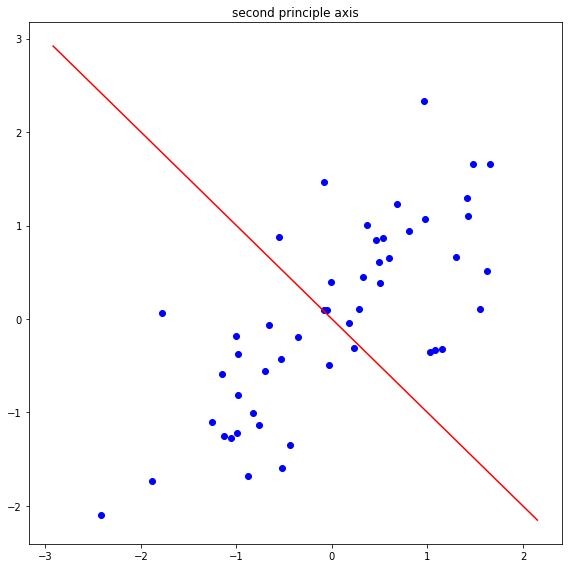

In [95]:
# ===================================
# for plotting here


# second_x = np.arange(normal_x.min() - 0.5, normal_x.max() + 0.5, 0.01)
# second_y = (second_eigenVector[1] / second_eigenVector[0]) * second_x

# plt.figure(figsize=(8,8))
# plt.title('second principle axis')

# plt.plot(normal_x, normal_y, 'o', color = 'blue')

# plt.plot(second_x, second_y, '-', color = 'red')

# plt.tight_layout()
# plt.show()


# ===================================

def plot_second_principal_axis(normal_x, normal_y, e_Value, e_Vector): 
    second_eigenValue = e_Value[1]
    second_eigenVector = e_Vector[:, 1]
    
    second_x = np.arange(normal_x.min() - 0.5, normal_x.max() + 0.5, 0.01)
    second_y = (second_eigenVector[1] / second_eigenVector[0]) * second_x
    
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    plt.plot(normal_x, normal_y, 'o', color = 'blue')

    plt.plot(second_x, second_y, '-', color = 'red')

    plt.tight_layout()
    plt.show()

## compute the projection of point onto the line

In [56]:
def compute_projection_onto_line(feature, vector):
    projection = (np.dot(feature, vector) / np.dot(vector, vector)) * vector
    
    return projection

## projcet to the first principal axis

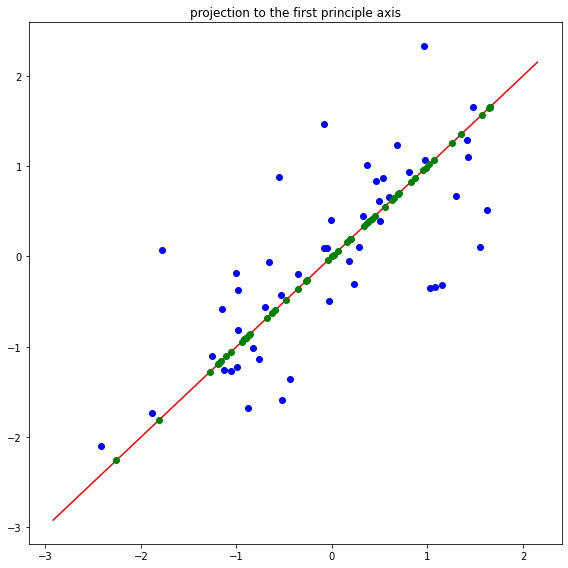

In [96]:
# ======================================
# for plotting here


# first_pro_z = np.zeros((normal_z.shape[0], normal_z.shape[1]))

# for i in range(normal_z.shape[0]):
#     first_pro_z[i] = compute_projection_onto_line(normal_z[i], first_eigenVector)
    
# first_pro_x = first_pro_z[:, 0]
# first_pro_y = first_pro_z[:, 1]

# plt.figure(figsize=(8,8))
# plt.title('projection to the first principle axis')

# plt.plot(normal_x, normal_y, 'o', color = 'blue')
# plt.plot(first_x, first_y, '-', color = 'red')

# plt.plot(first_pro_x, first_pro_y, 'o', color = 'green')

# plt.tight_layout()
# plt.show()


# ======================================

def plot_projection_first_principal_axis(normal_x, normal_y, normal_z, e_Value, e_Vector):
    first_eigenValue = e_Value[0]
    first_eigenVector = e_Vector[:, 0]
    
    first_x = np.arange(normal_x.min() - 0.5, normal_x.max() + 0.5, 0.01)
    first_y = (first_eigenVector[1] / first_eigenVector[0]) * first_x
    
    first_pro_z = np.zeros((normal_z.shape[0], normal_z.shape[1]))

    for i in range(normal_z.shape[0]):
        first_pro_z[i] = compute_projection_onto_line(normal_z[i], first_eigenVector)

    first_pro_x = first_pro_z[:, 0]
    first_pro_y = first_pro_z[:, 1]

    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    plt.plot(normal_x, normal_y, 'o', color = 'blue')
    plt.plot(first_x, first_y, '-', color = 'red')

    plt.plot(first_pro_x, first_pro_y, 'o', color = 'green')

    plt.tight_layout()
    plt.show()

## projcet to the second principal axis

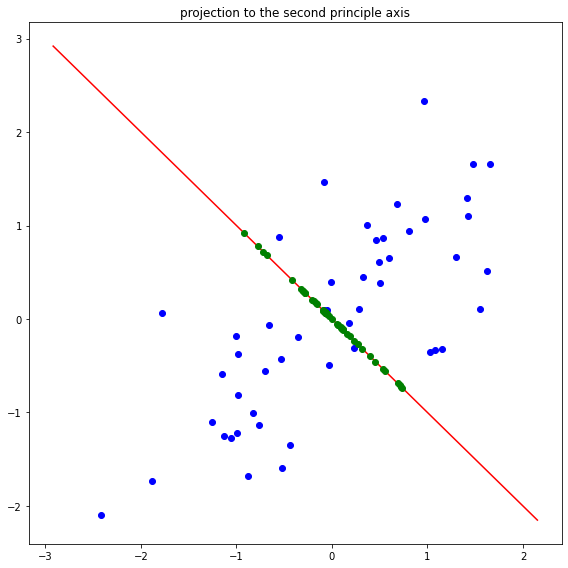

In [97]:
# =====================================
# for plotting here


# second_pro_z = np.zeros((normal_z.shape[0], normal_z.shape[1]))

# for i in range(normal_z.shape[0]):
#     second_pro_z[i] = compute_projection_onto_line(normal_z[i], second_eigenVector)

# second_pro_x = second_pro_z[:, 0]
# second_pro_y = second_pro_z[:, 1]

# plt.figure(figsize=(8,8))
# plt.title('projection to the second principle axis')

# plt.plot(normal_x, normal_y, 'o', color = 'blue')
# plt.plot(second_x, second_y, '-', color = 'red')

# plt.plot(second_pro_x, second_pro_y, 'o', color = 'green')

# plt.tight_layout()
# plt.show()


# ======================================

def plot_projection_second_principal_axis(normal_x, normal_y, normal_z, e_Value, e_Vector):
    second_eigenValue = e_Value[1]
    second_eigenVector = e_Vector[:, 1]
    
    second_x = np.arange(normal_x.min() - 0.5, normal_x.max() + 0.5, 0.01)
    second_y = (second_eigenVector[1] / second_eigenVector[0]) * second_x
    
    second_pro_z = np.zeros((normal_z.shape[0], normal_z.shape[1]))

    for i in range(normal_z.shape[0]):
        second_pro_z[i] = compute_projection_onto_line(normal_z[i], second_eigenVector)

    second_pro_x = second_pro_z[:, 0]
    second_pro_y = second_pro_z[:, 1]
    
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    plt.plot(normal_x, normal_y, 'o', color = 'blue')
    plt.plot(second_x, second_y, '-', color = 'red')

    plt.plot(second_pro_x, second_pro_y, 'o', color = 'green')

    plt.tight_layout()
    plt.show()

## connect original data to the projection onto the first principal axis

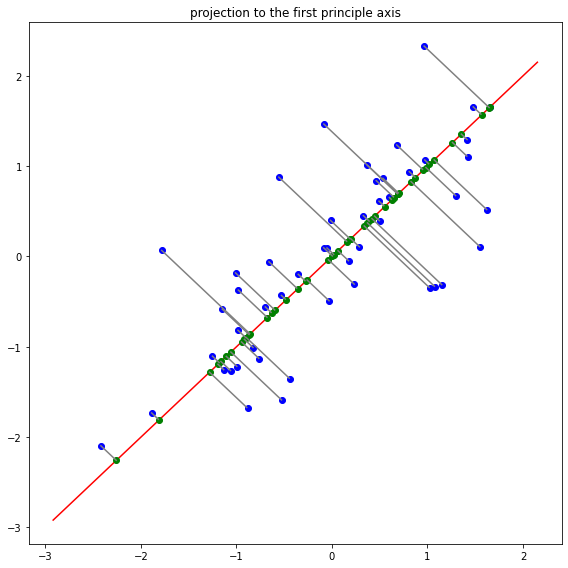

In [99]:
# ============================================
# for plotting here


# plt.figure(figsize=(8,8))
# plt.title('projection to the first principle axis')

# plt.plot(normal_x, normal_y, 'o', color = 'blue')
# plt.plot(first_x, first_y, '-', color = 'red')
# plt.plot(first_pro_x, first_pro_y, 'o', color = 'green')

# first_pro_vector = normal_z - first_pro_z
# first_pro_vector_x = first_pro_vector[:, 0]
# first_pro_vector_y = first_pro_vector[:, 1]

# for i in range(first_pro_vector.shape[0]):
#     if(normal_x[i] > first_pro_x[i]):
#         first_xx = np.arange(first_pro_x[i], normal_x[i], 0.01)
#         first_yy = (first_pro_vector_y[i] / first_pro_vector_x[i]) * (first_xx - first_pro_x[i]) + first_pro_y[i]

#         plt.plot(first_xx, first_yy, '-', color = 'gray')
#     elif(normal_x[i] < first_pro_x[i]):
#         first_xx = np.arange(normal_x[i], first_pro_x[i], 0.01)
#         first_yy = (first_pro_vector_y[i] / first_pro_vector_x[i]) * (first_xx - first_pro_x[i]) + first_pro_y[i]

#         plt.plot(first_xx, first_yy, '-', color = 'gray')

# plt.tight_layout()
# plt.show()


# =============================================

def plot_connection_first_original_to_projection(normal_x, normal_y, normal_z, e_Value, e_Vector):
    first_eigenValue = e_Value[0]
    first_eigenVector = e_Vector[:, 0]
    
    first_x = np.arange(normal_x.min() - 0.5, normal_x.max() + 0.5, 0.01)
    first_y = (first_eigenVector[1] / first_eigenVector[0]) * first_x
    
    first_pro_z = np.zeros((normal_z.shape[0], normal_z.shape[1]))

    for i in range(normal_z.shape[0]):
        first_pro_z[i] = compute_projection_onto_line(normal_z[i], first_eigenVector)

    first_pro_x = first_pro_z[:, 0]
    first_pro_y = first_pro_z[:, 1]
    
    first_pro_vector = normal_z - first_pro_z
    first_pro_vector_x = first_pro_vector[:, 0]
    first_pro_vector_y = first_pro_vector[:, 1]
            
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    plt.plot(normal_x, normal_y, 'o', color = 'blue')
    plt.plot(first_x, first_y, '-', color = 'red')
    plt.plot(first_pro_x, first_pro_y, 'o', color = 'green')
    
    for i in range(first_pro_vector.shape[0]):
        if(normal_x[i] > first_pro_x[i]):
            first_xx = np.arange(first_pro_x[i], normal_x[i], 0.01)
            first_yy = (first_pro_vector_y[i] / first_pro_vector_x[i]) * (first_xx - first_pro_x[i]) + first_pro_y[i]

            plt.plot(first_xx, first_yy, '-', color = 'gray')
        elif(normal_x[i] < first_pro_x[i]):
            first_xx = np.arange(normal_x[i], first_pro_x[i], 0.01)
            first_yy = (first_pro_vector_y[i] / first_pro_vector_x[i]) * (first_xx - first_pro_x[i]) + first_pro_y[i]

            plt.plot(first_xx, first_yy, '-', color = 'gray')

    plt.tight_layout()
    plt.show()

## connect original data to the projection onto the second principal axis

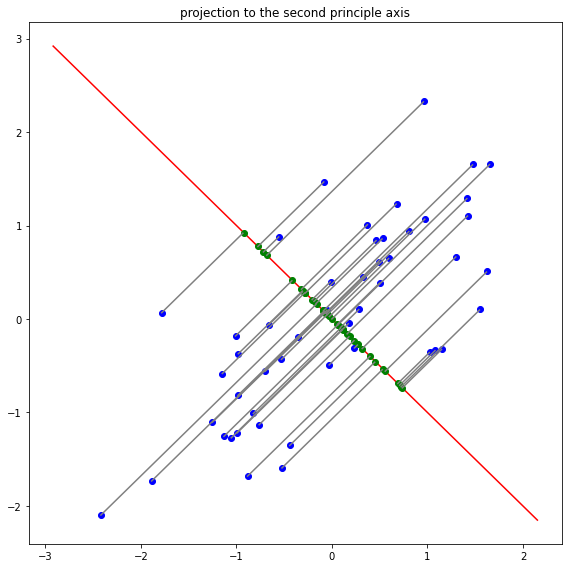

In [100]:
# =============================================
# for plotting here


# plt.figure(figsize=(8,8))
# plt.title('projection to the second principle axis')

# plt.plot(normal_x, normal_y, 'o', color = 'blue')
# plt.plot(second_x, second_y, '-', color = 'red')
# plt.plot(second_pro_x, second_pro_y, 'o', color = 'green')

# second_pro_vector = normal_z - second_pro_z
# second_pro_vector_x = second_pro_vector[:, 0]
# second_pro_vector_y = second_pro_vector[:, 1]

# for i in range(second_pro_vector.shape[0]):
#     if(normal_x[i] > second_pro_x[i]):
#         second_xx = np.arange(second_pro_x[i], normal_x[i], 0.01)
#         second_yy = (second_pro_vector_y[i] / second_pro_vector_x[i]) * (second_xx - second_pro_x[i]) + second_pro_y[i]

#         plt.plot(second_xx, second_yy, '-', color = 'gray')
#     elif(normal_x[i] < second_pro_x[i]):
#         second_xx = np.arange(normal_x[i], second_pro_x[i], 0.01)
#         second_yy = (second_pro_vector_y[i] / second_pro_vector_x[i]) * (second_xx - second_pro_x[i]) + second_pro_y[i]

#         plt.plot(second_xx, second_yy, '-', color = 'gray')

# plt.tight_layout()
# plt.show()


# =============================================

def plot_connection_second_original_to_projection(normal_x, normal_y, normal_z, e_Value, e_Vector):
    second_eigenValue = e_Value[1]
    second_eigenVector = e_Vector[:, 1]
    
    second_x = np.arange(normal_x.min() - 0.5, normal_x.max() + 0.5, 0.01)
    second_y = (second_eigenVector[1] / second_eigenVector[0]) * second_x
    
    second_pro_z = np.zeros((normal_z.shape[0], normal_z.shape[1]))

    for i in range(normal_z.shape[0]):
        second_pro_z[i] = compute_projection_onto_line(normal_z[i], second_eigenVector)

    second_pro_x = second_pro_z[:, 0]
    second_pro_y = second_pro_z[:, 1]
    
    second_pro_vector = normal_z - second_pro_z
    second_pro_vector_x = second_pro_vector[:, 0]
    second_pro_vector_y = second_pro_vector[:, 1]
            
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    plt.plot(normal_x, normal_y, 'o', color = 'blue')
    plt.plot(second_x, second_y, '-', color = 'red')
    plt.plot(second_pro_x, second_pro_y, 'o', color = 'green')
    
    for i in range(second_pro_vector.shape[0]):
        if(normal_x[i] > second_pro_x[i]):
            second_xx = np.arange(second_pro_x[i], normal_x[i], 0.01)
            second_yy = (second_pro_vector_y[i] / second_pro_vector_x[i]) * (second_xx - second_pro_x[i]) + second_pro_y[i]

            plt.plot(second_xx, second_yy, '-', color = 'gray')
        elif(normal_x[i] < second_pro_x[i]):
            second_xx = np.arange(normal_x[i], second_pro_x[i], 0.01)
            second_yy = (second_pro_vector_y[i] / second_pro_vector_x[i]) * (second_xx - second_pro_x[i]) + second_pro_y[i]

            plt.plot(second_xx, second_yy, '-', color = 'gray')

    plt.tight_layout()
    plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

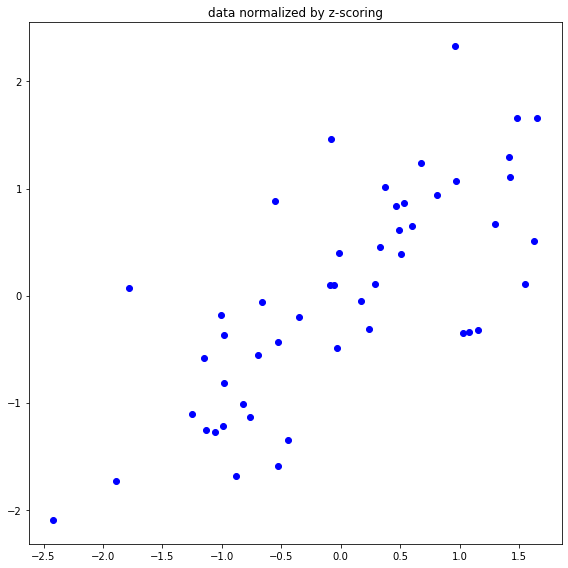

In [61]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')

normal_z = (feature - feature.mean(axis = 0)) / feature.std(axis = 0)
normal_x = normal_z[:, 0]
normal_y = normal_z[:, 1]

plt.plot(normal_x, normal_y, 'o', color = 'blue')

plt.tight_layout()
plt.show()

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

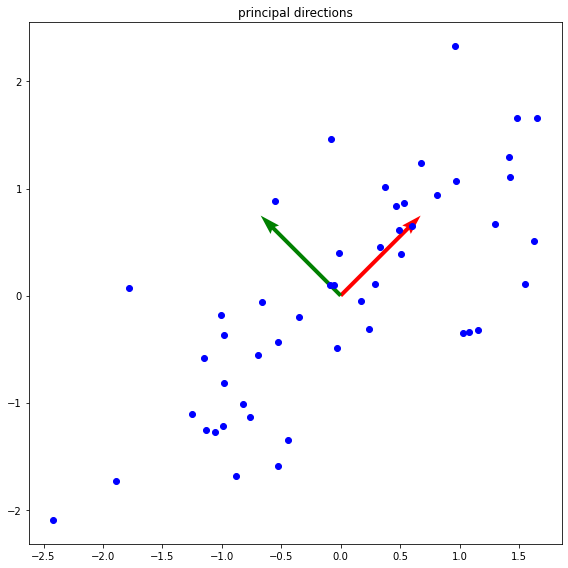

In [65]:
plt.figure(figsize=(8,8))
plt.title('principal directions')

plt.plot(normal_x, normal_y, 'o', color = 'blue')

origin = [0, 0]

sigma = compute_covariance(normal_z)
e_Value, e_Vector = compute_eigen(sigma)

first_eigenValue = e_Value[0]
first_eigenVector = e_Vector[:, 0]

second_eigenValue = e_Value[1]
second_eigenVector = e_Vector[:, 1]

plt.quiver(*origin, *first_eigenVector, color = 'red', scale_units='xy', scale = 1)
plt.quiver(*origin, *second_eigenVector, color = 'green', scale_units='xy', scale = 1)

plt.tight_layout()
plt.show()

***

### 3. plot the first principal axis in red on the normalized data in blue

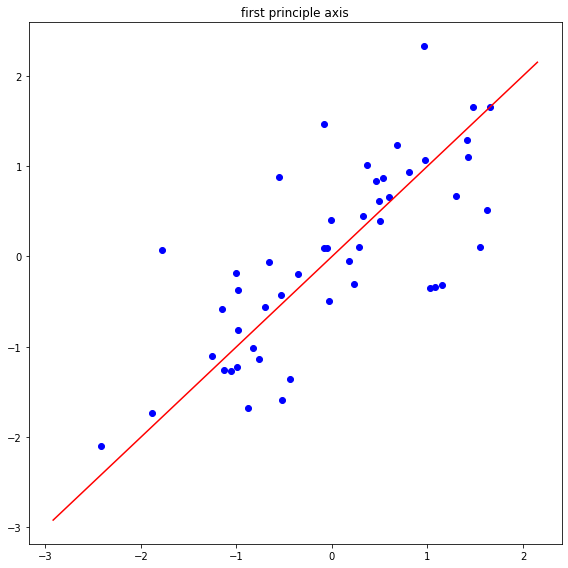

In [66]:
plt.figure(figsize=(8,8))
plt.title('first principle axis')

plt.plot(normal_x, normal_y, 'o', color = 'blue')

first_x = np.arange(normal_x.min() - 0.5, normal_x.max() + 0.5, 0.01)
first_y = (first_eigenVector[1] / first_eigenVector[0]) * first_x

plt.plot(first_x, first_y, '-', color = 'red')

plt.tight_layout()
plt.show()

***

### 4. plot the second principal axis in red on the normalized data in blue

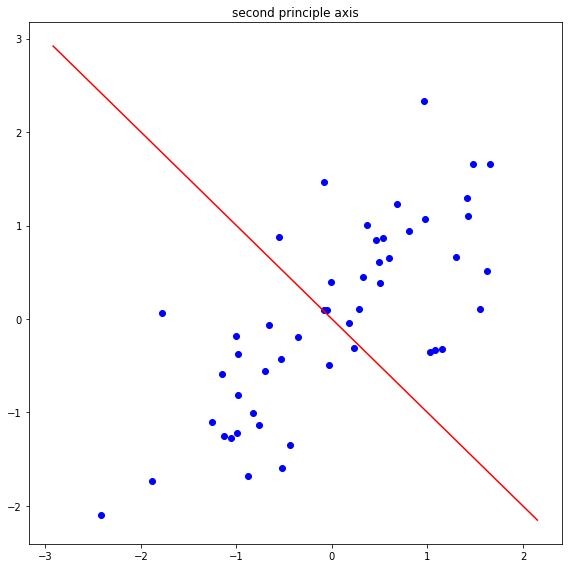

In [67]:
plt.figure(figsize=(8,8))
plt.title('second principle axis')

plt.plot(normal_x, normal_y, 'o', color = 'blue')

second_x = np.arange(normal_x.min() - 0.5, normal_x.max() + 0.5, 0.01)
second_y = (second_eigenVector[1] / second_eigenVector[0]) * second_x

plt.plot(second_x, second_y, '-', color = 'red')

plt.tight_layout()
plt.show()

***

### 5. plot the projection of data in green onto the first principal axis in red

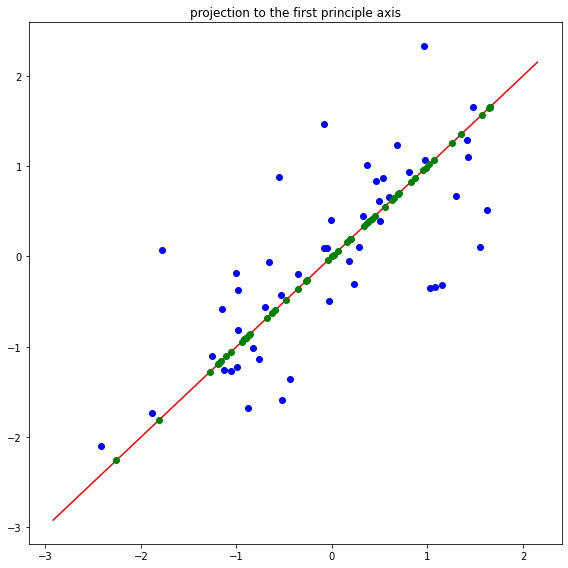

In [68]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')

plt.plot(normal_x, normal_y, 'o', color = 'blue')
plt.plot(first_x, first_y, '-', color = 'red')

first_pro_z = np.zeros((normal_z.shape[0], normal_z.shape[1]))

for i in range(normal_z.shape[0]):
    first_pro_z[i] = compute_projection_onto_line(normal_z[i], first_eigenVector)

first_pro_x = first_pro_z[:, 0]
first_pro_y = first_pro_z[:, 1]

plt.plot(first_pro_x, first_pro_y, 'o', color = 'green')
    
plt.tight_layout()
plt.show()

***

### 6. plot the projection of data in green onto the second principal axis in red

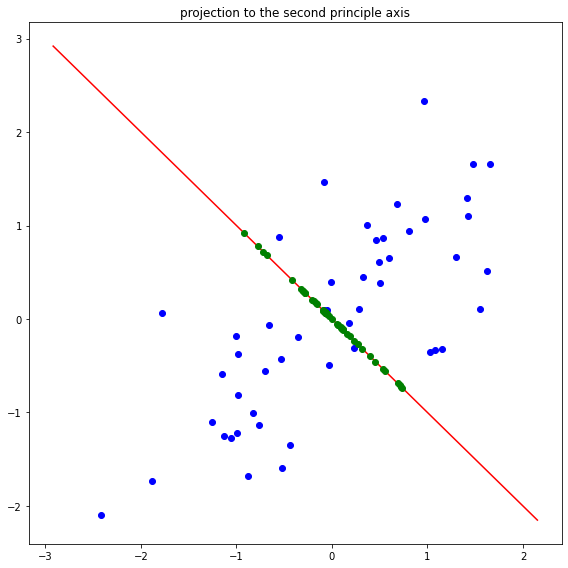

In [69]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')

plt.plot(normal_x, normal_y, 'o', color = 'blue')
plt.plot(second_x, second_y, '-', color = 'red')

second_pro_z = np.zeros((normal_z.shape[0], normal_z.shape[1]))

for i in range(normal_z.shape[0]):
    second_pro_z[i] = compute_projection_onto_line(normal_z[i], second_eigenVector)

second_pro_x = second_pro_z[:, 0]
second_pro_y = second_pro_z[:, 1]

plt.plot(second_pro_x, second_pro_y, 'o', color = 'green')

plt.tight_layout()
plt.show()

***

### 7. plot the projection line in grey onto the first principal axis

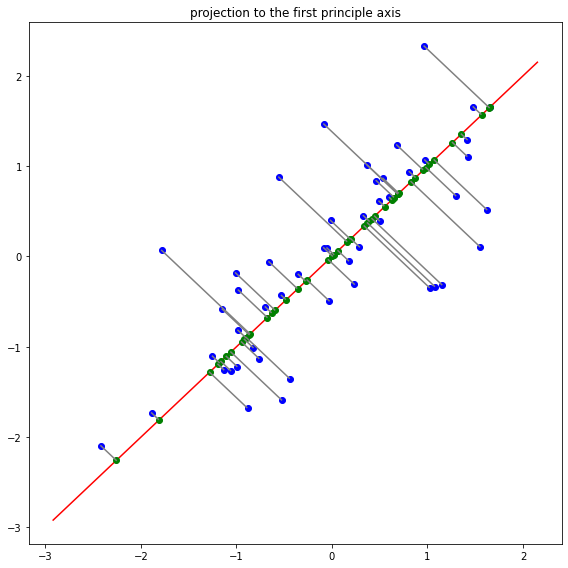

In [70]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')

plt.plot(normal_x, normal_y, 'o', color = 'blue')
plt.plot(first_x, first_y, '-', color = 'red')
plt.plot(first_pro_x, first_pro_y, 'o', color = 'green')

first_pro_vector = normal_z - first_pro_z
first_pro_vector_x = first_pro_vector[:, 0]
first_pro_vector_y = first_pro_vector[:, 1]

for i in range(first_pro_vector.shape[0]):
    if(normal_x[i] > first_pro_x[i]):
        first_xx = np.arange(first_pro_x[i], normal_x[i], 0.01)
        first_yy = (first_pro_vector_y[i] / first_pro_vector_x[i]) * (first_xx - first_pro_x[i]) + first_pro_y[i]

        plt.plot(first_xx, first_yy, '-', color = 'gray')
    elif(normal_x[i] < first_pro_x[i]):
        first_xx = np.arange(normal_x[i], first_pro_x[i], 0.01)
        first_yy = (first_pro_vector_y[i] / first_pro_vector_x[i]) * (first_xx - first_pro_x[i]) + first_pro_y[i]

        plt.plot(first_xx, first_yy, '-', color = 'gray')

plt.tight_layout()
plt.show()

***

### 8. plot the projection line in grey onto the second principal axis

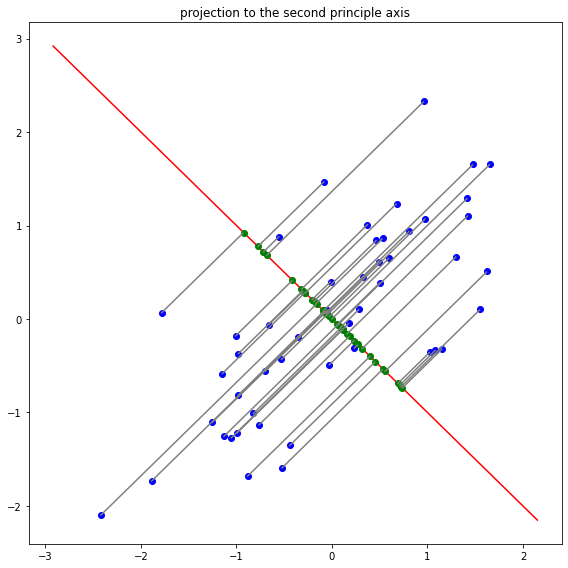

In [71]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')

plt.plot(normal_x, normal_y, 'o', color = 'blue')
plt.plot(second_x, second_y, '-', color = 'red')
plt.plot(second_pro_x, second_pro_y, 'o', color = 'green')

second_pro_vector = normal_z - second_pro_z
second_pro_vector_x = second_pro_vector[:, 0]
second_pro_vector_y = second_pro_vector[:, 1]

for i in range(second_pro_vector.shape[0]):
    if(normal_x[i] > second_pro_x[i]):
        second_xx = np.arange(second_pro_x[i], normal_x[i], 0.01)
        second_yy = (second_pro_vector_y[i] / second_pro_vector_x[i]) * (second_xx - second_pro_x[i]) + second_pro_y[i]

        plt.plot(second_xx, second_yy, '-', color = 'gray')
    elif(normal_x[i] < second_pro_x[i]):
        second_xx = np.arange(normal_x[i], second_pro_x[i], 0.01)
        second_yy = (second_pro_vector_y[i] / second_pro_vector_x[i]) * (second_xx - second_pro_x[i]) + second_pro_y[i]

        plt.plot(second_xx, second_yy, '-', color = 'gray')

plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***